In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('D:\Downloads\heart.data_\heart.data.csv')

In [3]:
print(df.head())

   Unnamed: 0     biking    smoking  heart.disease
0           1  30.801246  10.896608      11.769423
1           2  65.129215   2.219563       2.854081
2           3   1.959665  17.588331      17.177803
3           4  44.800196   2.802559       6.816647
4           5  69.428454  15.974505       4.062224


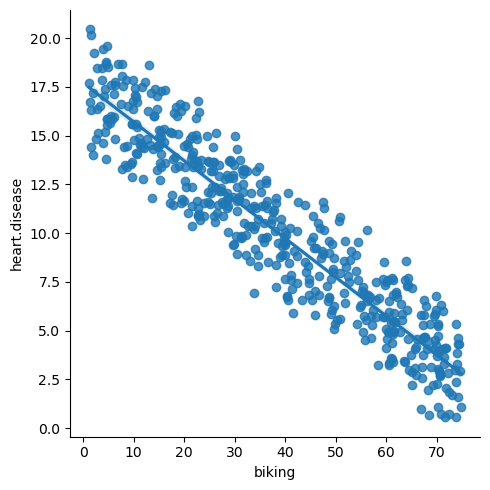

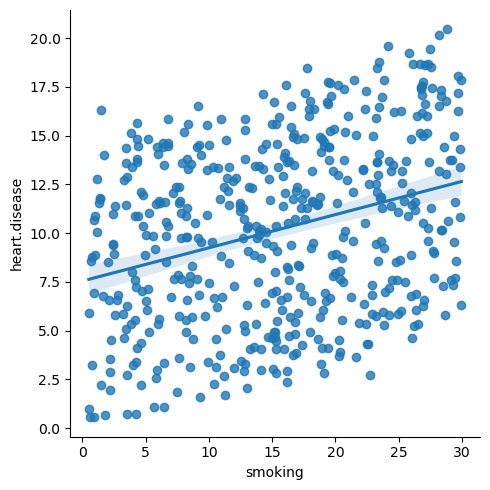

In [13]:

sns.lmplot(x='biking', y='heart.disease', data=df)  
sns.lmplot(x='smoking', y='heart.disease', data=df)

In [4]:
df=df.drop("Unnamed: 0", axis=1)

In [5]:
df_x=df.drop('heart.disease', axis =1)

In [7]:
df_y=df['heart.disease']

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df_x)
x= scaler.transform(df_x)


In [17]:
y=df_y.to_numpy()

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


from sklearn import linear_model

model = linear_model.LinearRegression()

In [20]:
model.fit(X_train, y_train) 
print(model.score(X_train, y_train)) 



0.9805244861700972


In [21]:
prediction_test = model.predict(X_test)    
print(y_test, prediction_test)
print("Mean sq. errror between y_test and predicted =", np.mean(prediction_test-y_test)**2)


[ 6.75601546  9.46602604 14.08865401 13.37742996 16.38467802 13.37980742
  7.59179728 10.05580546  6.80839968 12.09848437  7.81638864  9.83547443
  4.94609016  9.77538589  7.70739764 17.05893586  4.29637701  7.98222748
  5.52393102  5.92568029  1.10482036  7.61880347 12.37369096 14.17984416
 11.63207228 13.17374097  6.50794745 10.37232868 13.37300547 11.75315615
  8.55785408 12.04664323 12.92167259 17.17780348  3.29621777  6.51670365
  6.7390807   7.59016604 13.28367033 10.86552244  2.70846056  3.40208038
  8.02740434 10.37756908 11.76942278  8.60827208 15.98937136  7.47437198
 17.87769197  3.68936446  0.98753645  5.07228124  6.95950199 15.19818432
  9.74718577  6.71507793  7.93060122 11.29439158 13.01604512  4.07682347
  7.3303757   7.04062107 13.47050633  5.56092164 11.10563057 12.81263706
 16.16479395  5.68568185 17.47394032  9.23007425  4.70700936  3.74449837
 18.68979793 16.19911804  3.10933775  9.51338391 13.28152871  6.73577092
 11.1407355   8.86792508 19.43196008  6.91625864 14

In [22]:
print(model.coef_, model.intercept_)


[-14.81400097   5.24488822] 14.886239364884906


In [26]:
print(model.predict([[2, 23]]))

[105.89066652]


In [27]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Input, InputLayer


In [28]:
from keras.optimizers import SGD
opt = SGD(learning_rate=0.1)

model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1], )))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=opt)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [29]:
history = model.fit(X_train, y_train ,verbose=1, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
13/13 [==============================] - 0s 11ms/step - loss: 39.8141 - val_loss: 17.9884
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 18.2336 - val_loss: 13.0047
Epoch 3/50
13/13 [==============================] - 0s 3ms/step - loss: 12.6207 - val_loss: 9.2727
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 8.8448 - val_loss: 6.4365
Epoch 5/50
13/13 [==============================] - 0s 2ms/step - loss: 6.3144 - val_loss: 4.5036
Epoch 6/50
13/13 [==============================] - 0s 3ms/step - loss: 4.5510 - val_loss: 3.3519
Epoch 7/50
13/13 [==============================] - 0s 3ms/step - loss: 3.3202 - val_loss: 2.3715
Epoch 8/50
13/13 [==============================] - 0s 3ms/step - loss: 2.5032 - val_loss: 1.8580
Epoch 9/50
13/13 [==============================] - 0s 3ms/step - loss: 1.9051 - val_loss: 1.4399
Epoch 10/50
13/13 [==============================] - 0s 3ms/step - loss: 1.4943 - val_loss: 1.1328
Epoch 11/50
1

In [30]:
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]


In [31]:
prediction_test = model.predict(X_test)    
print(y_test, prediction_test)
print("Mean sq. errror between y_test and predicted =", np.mean(prediction_test-y_test)**2)


4/4 [==============================] - 0s 675us/step
[ 6.75601546  9.46602604 14.08865401 13.37742996 16.38467802 13.37980742
  7.59179728 10.05580546  6.80839968 12.09848437  7.81638864  9.83547443
  4.94609016  9.77538589  7.70739764 17.05893586  4.29637701  7.98222748
  5.52393102  5.92568029  1.10482036  7.61880347 12.37369096 14.17984416
 11.63207228 13.17374097  6.50794745 10.37232868 13.37300547 11.75315615
  8.55785408 12.04664323 12.92167259 17.17780348  3.29621777  6.51670365
  6.7390807   7.59016604 13.28367033 10.86552244  2.70846056  3.40208038
  8.02740434 10.37756908 11.76942278  8.60827208 15.98937136  7.47437198
 17.87769197  3.68936446  0.98753645  5.07228124  6.95950199 15.19818432
  9.74718577  6.71507793  7.93060122 11.29439158 13.01604512  4.07682347
  7.3303757   7.04062107 13.47050633  5.56092164 11.10563057 12.81263706
 16.16479395  5.68568185 17.47394032  9.23007425  4.70700936  3.74449837
 18.68979793 16.19911804  3.10933775  9.51338391 13.28152871  6.7357709

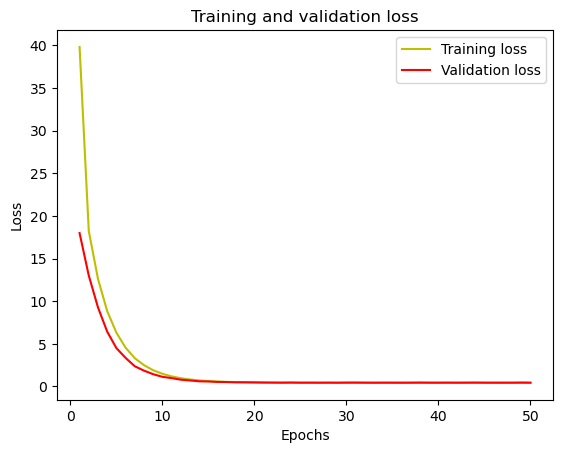

In [32]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
print("weights", weights)
print("biases", biases)

weights [[-14.805669 ]
 [  5.2630415]]
biases [14.870229]
